In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SMSSpamCollection2.csv to SMSSpamCollection2.csv


In [ ]:
df_sms = pd.read_csv('SMSSpamCollection2.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"SMS"})
df_sms.head()

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df_sms.label.value_counts()

ham     8479
spam    2297
Name: label, dtype: int64

In [ ]:
df_sms['Labeling']= df_sms['label'].map({'ham': 1, 'spam':0})
df_sms.head()

,label,SMS,Labeling
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [ ]:
df_sms['length'] = df_sms['SMS'].apply(len)
df_sms.head()

,label,SMS,Labeling,length
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


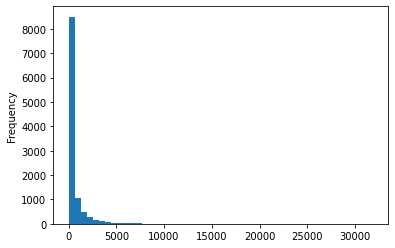

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbff476850>,
      dtype=object)

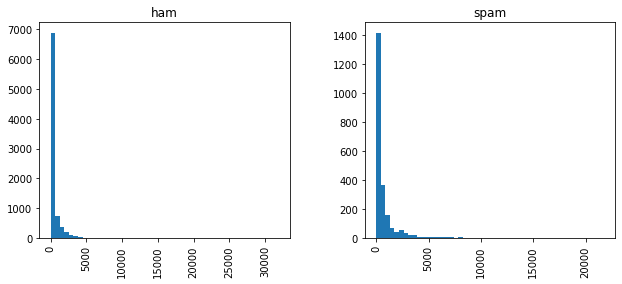

In [ ]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def transform_text(SMS):
    SMS = SMS.lower()
    SMS = nltk.word_tokenize(SMS)

    y = []
    for i in SMS:
        if i.isalnum():
            y.append(i)

    SMS = y[:]
    y.clear()

    for i in SMS:
        if i not in stopwords.words('english'):
            y.append(i)

    SMS = y[:]
    y.clear()

    for i in SMS:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
df_sms['transformed_text'] = df_sms['SMS'].apply(transform_text)

In [ ]:
df_sms.head()

,label,SMS,Labeling,length,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",1,111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,1,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,1,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vector = CountVectorizer(stop_words ='english')
tfidf = TfidfVectorizer(max_features=3000)  #1


In [ ]:
X = tfidf.fit_transform(df_sms['transformed_text']).toarray()

In [ ]:
#X = df_sms['transformed_text']
Y = df_sms['Labeling']
from sklearn.model_selection import train_test_split as tt
X_train, X_test, Y_train, Y_test = tt(X, Y,test_size=0.2, random_state=100)

In [ ]:
X_train.shape

(8620, 3000)

In [ ]:
X_test.shape

(2156, 3000)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(Y_test,y_pred))
print()
print(accuracy_score(Y_test,y_pred))


[[ 399   77]
 [  33 1647]]

0.9489795918367347


In [ ]:





input_sms=input("enter the message")
transformed_sms=transform_text(input_sms)
X_test_transformed=tfidf.transform([transformed_sms])
result=model.predict(X_test_transformed)[0]
if result==1:
  print("Ham")
else:
  print(" spam")


enter the messagehi ia am fine
